Homework 1 — (15 points)
======
### What to hand in
1. A Jupyter notebook containing all code and output (figures and audio). I should be able to evaluate the file to reproduce all output. 
1. Any other data that we tell you to save to a file (e.g. audio files).

### How to hand it in
1. Compress all of the files specified into a .zip file. 
1. Name the file in the following manner, firstname_lastname_hw1.zip. For example, Bryan_Pardo_hw1.zip. 
1. Submit this .zip file via Canvas

## Run this code block 1st, to import likely needed packages

In [1]:
# This line imports most packages you'll need. You may need to import others (eg random and cmath)
import IPython, numpy as np, scipy as sp, matplotlib.pyplot as plt, matplotlib, sklearn, librosa, cmath,math
from IPython.display import Audio

# This line makes sure your plots happen IN the webpage you're building, instead of in separate windows.
%matplotlib inline

## Questions

#### 1. (one point) Go out on the web and read about the early history of audio recording. Thomas Edison, Alexandar Graham Bell,  Édouard-Léon Scott de Martinville and Valdemar Poulsen are all big names in the history of audio recording. Give a brief overview (no more than two sentences) for each of these people on what that person contributed to audio recording.

Thomas Edison: Invented the phonograph that recorded mechanically pressure waves and reproduce what was recorded.

Alexander Graham Bell: Patented the first practical telephone (priorly called the acoustic telegraph), realizing that multiple frequencies could be transmitted over telegraph wires to form complex signals. 

Edouard-Leon Scott de Martinville: Invented the earliest known sound recording device, the phonautograph. The phonautograph was modeled after the human ear, collected sound to be inscribed on lamp black coated cylinder, and could only visually represent the signal.

Valdemar Poulsen: developed a magnetic wire recorder, the telegraphone, (that preceded the magnetic tape recorder) and the first continuous wave radio transmitter. 

#### 2. (one point)  The sample rate of telephone audio (8 kHz) and CD quality audio (44.1 kHz) are very different. Explain what effect this difference in sample rate has on the ability of a recorder to reproduce sound and why the sample rate of CD audio is what it is. 

A higher sampling rate reproduces sound much more faithfully to the source , but accumulates many more values than the lower sampling rate. The CD sampling rate is much higher as to encode the musical qualities that require more information. The telephone sampling rate is just enough to transmit the necessary formants to percieve speech, but doesn't collect superfluous information. 

#### Sample rate isn't the only difference between CD and telephone audio. Express in dB the difference in dynamic range between 8 bit audio (telephone quality) and 16 bit audio (CD quality).  How many bits would one need to exceed the dynamic range of human hearing? Show you work.

8 bit audio can encode 2<sup>8</sup> = 256 different quantization levels. 16-bit audio can encode 2<sup>16</sup> = 65,536 different quantization levels. 

In [2]:
# your code to give the answer goes here
# part a)
#using D = 6.02B where D is dynamic range and B is bit depth
D = 6.02*16 - 6.02*8
print "a) ", D

#part b) if dynamic range of human hearing is 120 dB
B = 120 / 6.02
print "b) ", B

a)  48.16
b)  19.9335548173


#### 3. (one point) Make a function to generate sinewaves. Test the function for a simple case (e.g. a sinewave of frequency 10 Hz and length 1 sec, sampled at a rate of 100 Hz). Write a function to plot an audio signal and use it to display the generated sinewave (you can write your own plotting function or use the "plot_audio" function provided in the previous homework). Label the figure's axes appropriately.


In [3]:
def make_sinewave(f, t, sr):
    """    
    Parameters
    ----------
    f:  float
        Frequency of sine wave
    t:  float
        Duration in seconds
    sr: int
        Sample rate
    
    Returns
    -------
    np.ndarray 
        Array of floats containing the signal
    """
    t = np.arange(0,t*sr)/sr
    x = np.sin(2*np.pi*f*t)
    return x
    
    
def plot_audio(x, sr, figsize=(16,4), xlabel = 'Time (s)', ylabel='Amplitude'):
    """
    A simple audio plotting function
    
    Parameters
    ----------
    x: np.ndarray
        Audio signal to plot
    sr: int
        Sample rate
    figsize: tuple
        A duple representing the figure size (xdim,ydim)
    """
    length = float(x.shape[0]) / sr
    t = np.linspace(0,length,x.shape[0])
    plt.figure(figsize=figsize)
    plt.plot(t, x)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()

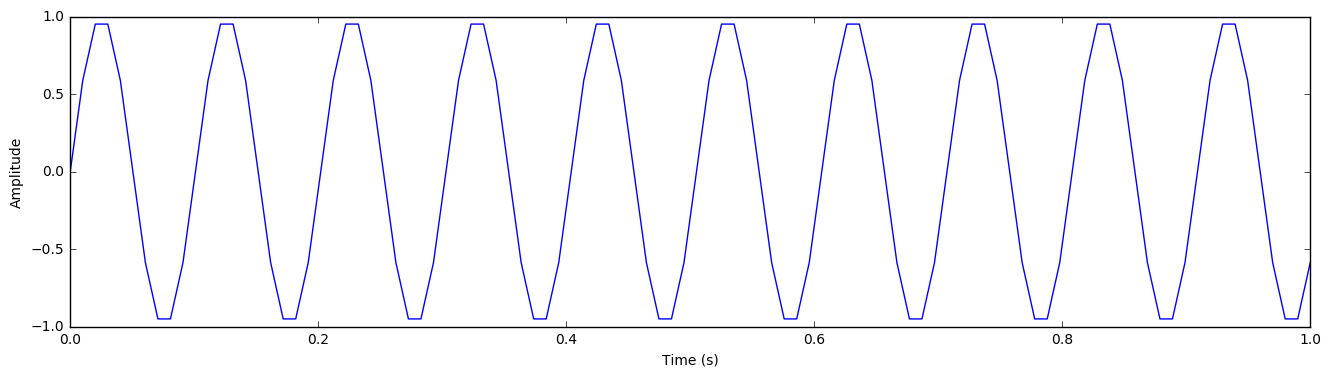

In [4]:
# write your code to test the "make_sinewave" function
sr = 100
test = make_sinewave(10., 1., sr)
plot_audio(test, sr=sr)

#### 4. (one point) What 3 pitch classes are in a C major triad? Make a C major triad out of sine waves that is in the same octave as A440 (i.e. starting on the C below A440). Display the waveform and play it.

C, E, and G

261.6, 
2<sup>4/12</sup>(261.6), 
2<sup>7/12</sup>(261.6)

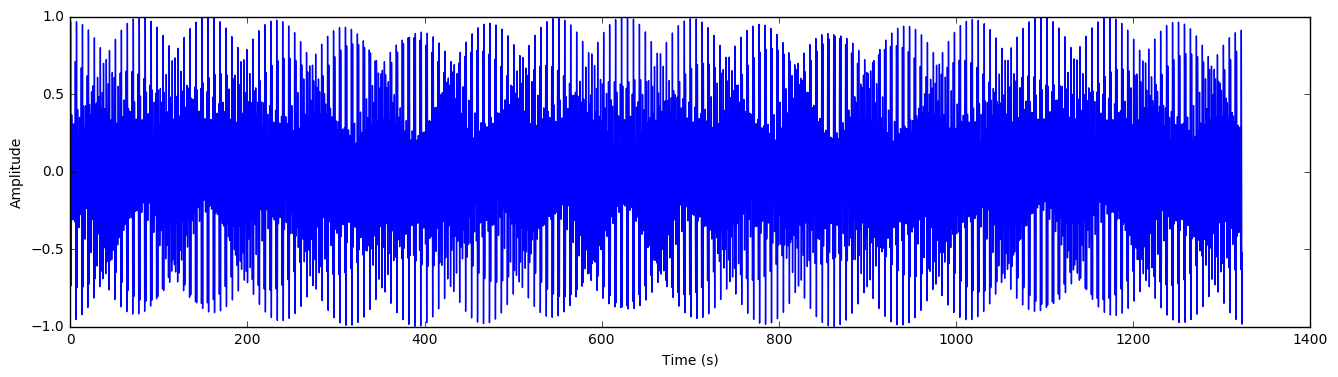

In [5]:
# Make, plot and play the C major triad here.
sr = 44100
C = make_sinewave(261.626, 3., sr)
E = make_sinewave(329.628, 3., sr)
G = make_sinewave(391.995, 3., sr)

triad = C + E + G
triad = triad / np.max(np.abs(triad))
plot_audio(triad, 100)

Audio(triad, rate=sr)

#### 5. (one point) Implement a simple function to express the Root Mean Squared Amplitude of a signal encoded as an array, in dB, with respect to a reference value (review the lecture on amplitude, slides no. 5-8).

In [6]:
def rms_db(signal, reference):
    '''
    Parameters
    ----------
    signal:  np.ndarray 
        Array of floats containing the signal
    reference:  float
        A reference amplitude to compare to 

    Returns
    -------
    float
        a value in dB, given the reference value
    '''
    sum_sq = sum(signal**2)
    x_rms = np.sqrt((1./signal.size)*sum_sq)
    db = 20*math.log((x_rms/reference), 10)
    return db
    
print rms_db(triad, 0.00002)

86.2066163134


#### 6. (one point) Make a signal.  Vary its volume and find out for yourself how many dB different sounds have to be, before you can tell the volume is different?  Play identical pairs, where the only difference between them is the amplitude. Start with 0 db difference, and grow the difference until you can reliably tell them apart.   Oh...and do this in a quiet room with headphones on. This won't work at all on your laptop speakers or in a loud room.

0.915149811214 dB


In [7]:
#write your code to make repeated pairs of audio that vary by differing dB amounts here.
wave_1 = make_sinewave(440, 1., 44100)
wave_2 = wave_1*0.9
wave_3 = np.append(wave_1, wave_1 * 0.75)


print rms_db(wave_1, 0.00002) - rms_db(wave_2, 0.00002)
Audio(wave_3, rate=44100)

0.915149811214


#### 7. (one point) Implement a Fourier transform function and an inverse Fourier transform function using the formulae from the course lecture notes.

In [8]:
def fourier_transform(x):
    """ 
    Performs a Fourier transform
    
    Parameters
    ----------
    x: np.ndarray 
        Array of real or complex values containing the signal
    
    Returns
    -------
    np.ndarray 
        Array of complex vaules containing the signal
    """
    N = x.shape[0]
    X = np.ndarray(N, dtype=complex)
    
    for k in range(N):
        sum = complex(0)
        for n in range(N):
            sum += x[n]*cmath.exp(-2j*cmath.pi*k*n/N)
        X[k] = sum
    return X

In [9]:
def inverse_fourier_transform(X):
    """ 
    Performs an inverse Fourier transform
    
    Parameters
    ----------
    x: np.ndarray 
        Array of  complex values containing the signal
    
    Return
    ------
    np.ndarray 
        Array of complex vaules containing the signal
    """
    N = X.shape[0]
    x = np.ndarray(N, dtype=complex)
    for n in range(N):
        sum = 0
        for k in range(N):
            sum += (1./N)*X[k]*cmath.exp(2*cmath.pi*cmath.sqrt(-1)*k*n/N)
        x[n] = sum
    return x

#### 8. (one point) Write code to test that these functions work properly. Be sure to explain why you think your test is a good one.

Composing the DFT and the IDFT to check the function is a good test because it requires that both functions be working properly. The result is very easy to compare to the original in order to determine it's viability.

Plotting the result of the DFT also is a good test. If the signal is known, then you can expect noise around level equal zero and a spike centered at the known frequencies.

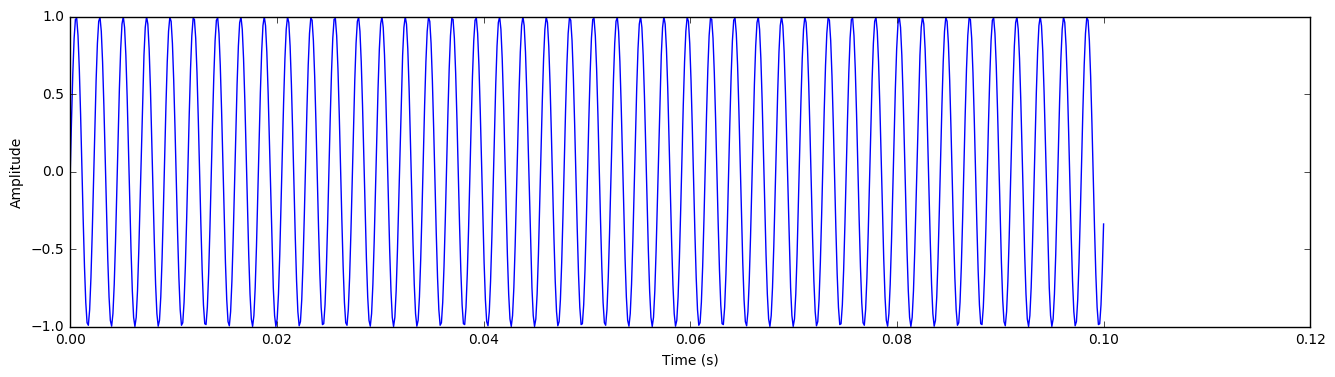

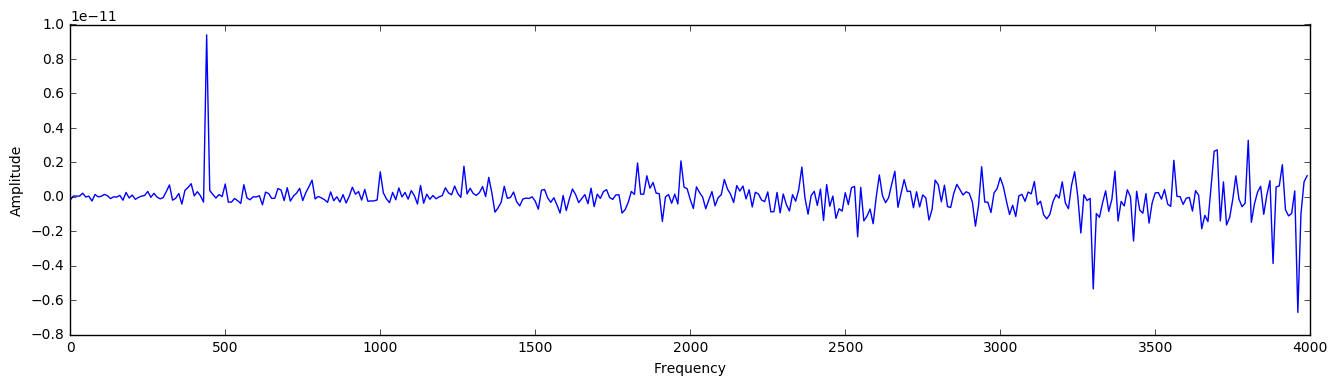

/Users/carolyn/Applications/miniconda2/envs/eecs352/lib/python2.7/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


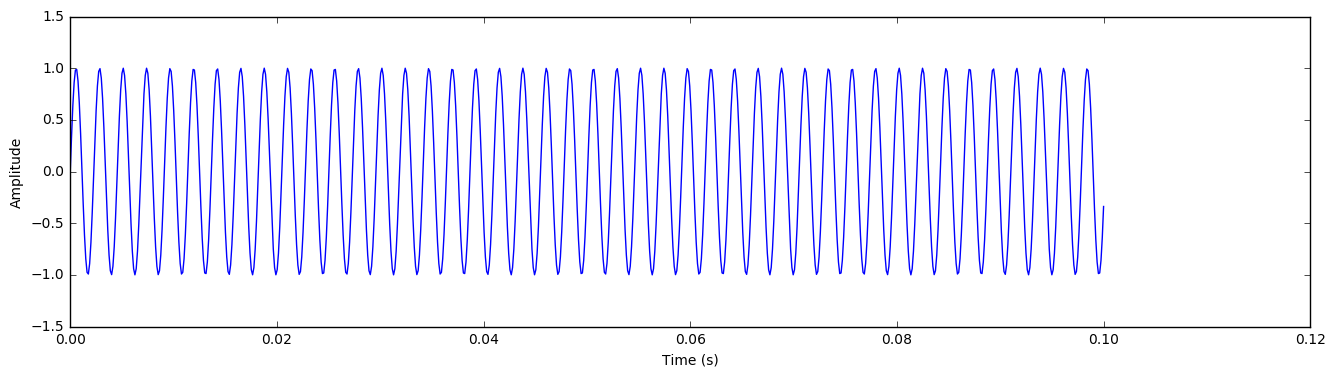

In [ ]:
# Write your code to check here. 
#  Be sure to explain in your comments how this test confirms the correctness.
# NOTE: 2 things *I* would test are (1) if I take the Fourier transform of a signal, 
# and then take its output as the input to the inverse Fourier transform, does the 
# result look like the original signal?  and (2) If I look at the result of the 
# Fourier transform, do I see a pattern of energy that I would expect to see, given
# what the input signal contains?
sr = 8000
time = 0.1
tone = make_sinewave(440.0, time, sr)
plot_audio(tone, sr)
transformed_tone = fourier_transform(tone)
length = float(transformed_tone.shape[0])
f = np.linspace(0,length, length)
plt.figure(figsize=(16, 4))
n = int(time*sr)
freqs = sp.fftpack.fftfreq(n,1./sr)
plt.plot(freqs[0:n/2].real, transformed_tone.real[0:n/2])
plt.ylabel('Amplitude')
plt.xlabel('Frequency')
plt.show()

inverted_tone = inverse_fourier_transform(transformed_tone)
plot_audio(inverted_tone, sr)

From this point on, you will use the fft and ifft functions from scipy, as they are much faster than the code you just wrote. See the following link for documentation on them. 
http://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html


Hint: https://docs.python.org/2/library/timeit.html and https://docs.python.org/2/library/time.html  are useful for the following problem.
            

#### 9. (one point) What is the computational complexity of the Fourier Transform  code you built? What is the computational complexity of the Fast Fourier Transform (FFT)? Illustrate the difference in running time by measuring how long it takes your fourier_transform code on signals of different length and plot the time to completion (vertical axis) as a function of the number of samples (horizontal axis). Compare that on the same graph to how long it took on the same number of samples with the python FFT. Do these time numbers back up the computational complexity?

The computational complexity of the fourier_transform method is O(n<sup>2</sup>).  The computational complexity of Fast Fourier Transform is O(n log(n)). 

In [ ]:
# Write your code to test the timing of the two approaches here.
import time
seconds = np.linspace(0.01,1.0,100)
sr = 1000
ft_times = [0]*100
fft_times = [0]*100
for i, sec in enumerate(seconds):
    
    signal = make_sinewave(100., sec, sr)
    t_start = time.time()
    fourier_transform(signal)
    t_mid = time.time()
    sp.fftpack.fft(signal)
    t_end = time.time()
    ft_times[i] = t_mid - t_start
    fft_times[i] = t_end - t_mid


In [ ]:
sample_counts = seconds*sr
plt.figure(figsize=(16, 4))
plt.plot(sample_counts, ft_times)
plt.plot(sample_counts, fft_times)
plt.ylabel('Time (Sec)')
plt.xlabel('Number of Samples')
plt.show()

#### 10. (one point) The choice of windowing function for your FFT is an important one. In this problem, we are going to investigate the effect of windowing on the spectra of sine waves. Write a function to compute the log-magnitude spectrum of a signal. Your function must receive the number of frequency samples as an input (there is an optional parameter in scipy's fft that lets you specify how many points the FFT has). 

#### Make an audio signal composed of 2 sine waves at 100 and 250 Hz. The sample rate should be 1000 Hz. Now compute the spectrum of the signal using a rectangular window of length 64 samples. In this part we set the number of FFT points to the same value as the window length. Then compute the spectrum using a a Hann window (from scipy.signal). Plot both spectra on the same axis. Compare the two plots. Be sure to label the frequency dimension correctly (horizontal = frequency in Hz) with the correct units. Be sure to label your two lines so we can tell which is which.

#### Which approach do you think gives a more accurate visualization of the signal contents, windowing the signal with a rectangular window or with a Hann window? Which one looks more accurate? What is the underlying reason? 

The Hann window, generally, is a more accurate visualization of the signal contents. The Hann window smooths the boundaries of the windows such that the jaggedness is not carried over into the transform. 

In [ ]:
def audio_spectrum(sig, win_len, win_type, Nfft):
    """
    Computes the spectrum of the first win_len samples of an audio signal
    
    Parameters
    ----------
    sig: np.ndarray
        Audio signal 
    win_len: int
        Length of the portion of the signal for which we calclate the spectrum(in samples).
        This should range between 1 and the length of sig.
    win_type: string
        Determines the window type including 'rectangular' and 'hann'
    Nfft: int
        Number of fft points (if Nfft is greater than win_len the fft function would zero pad the 
        windowed signal, if Nfft is smaller than win_len the "audio_spectrum funtion must generate 
        an error message)     
    """

    if win_len > Nfft:
        return 'Error'
    else:
        if win_type == 'rectangular':
            arr = sp.fftpack.fft(sig[0:win_len], n = Nfft)
        elif win_type == 'hann':
            hann_window = sp.signal.hann(win_len)
            sig_len = sig.shape[0]
            zeros = np.zeros(sig_len - win_len)
            padded_window = np.concatenate((hann_window, zeros))
            arr = sp.fftpack.fft(sig*padded_window, n = Nfft)
        
        freqs = sp.fftpack.fftfreq(win_len,1./1000)
        plt.figure(figsize=(16, 4))
        y = 20.0* np.log10(arr[0:win_len/2])
        plt.plot(freqs[0:win_len/2], y)
        plt.ylabel('Amplitude')
        plt.xlabel('Frequency (Hz)')
        plt.show()

In [ ]:
#Write your code for the harmonic sound here
rate = 1000
signal = make_sinewave(100., 2.0, sr=rate)  + make_sinewave(250., 2.0, sr=rate)
audio_spectrum(signal, 64, 'rectangular', 64)
audio_spectrum(signal, 64, 'hann', 64)

#### 11. (one point)  Now, do everything exactly like you did in question 10....except increase the number of FFT points (Nfft) to 256 and then to 512 (the window length win_len stays the same). When you calculate a FFT with more points than are in the signal, zeros are added to the input signal and interpolation is performed on the output signal. In general, zero-padding in the time domain is equivalent to creating new analysis bins in between original bins in the frequency domain. This often gives us a more accurate view of the frequency content in the signal. What are some of differences you notice in these plot compared to the previous one and what do you think is the underlying reason? What stays the same and what changes between the three plots?

You can read more about the effect of zero-padding on the frequency-domain representation in the follwing pages:

http://www.dsprelated.com/freebooks/sasp/Zero_Padding_Time_Domain.html

http://dspguru.com/dsp/howtos/how-to-interpolate-in-time-domain-by-zero-padding-in-frequency-domain



As it the case when you increase the resolution along any dimension, there is a smoother representation of the frequencies composing the input signal when you move from Nfft = 64 to 256 to 512. Technically, no new information is is created, but increasing the value of Nfft helps the display of the information.

In [ ]:
# write the code here
print "Rectangular Transform at Nfft = 256"
audio_spectrum(signal, 64, 'rectangular', 256)
print "Hann Transform at Nfft = 256"
audio_spectrum(signal, 64, 'hann', 256)

print "Rectangular Transform at Nfft = 512"
audio_spectrum(signal, 64, 'rectangular', 512)
print "Rectangular Transform at Nfft = 512"
audio_spectrum(signal, 64, 'hann', 512)

#### 12. (one point) What is the pitch (in Hz) of the lowest note played by a well-tuned piano using equal temperment tuned at A440? What is the pitch (in Hz) of the highest note? Now, given these numbers, assume you're recording at 44100 Hz (CD quality audio). Give a window length (in samples) so that the spacing between frequency bins (and therefore the frequency of the lowest component you can represent) is low enough to capture the lowest note on the piano. 

The lowest note played by a piano using equal temperment tuned at A440 is 27.5 Hz.
The highest note played by a piano using equal temperment tuned at A440 is 4186.0 Hz.

27.5 Hz = 44100 kHz / N samples --> window length ~= 1604 samples


#### 13. (one point) The case of the missing fundamental is where a sound seems to have a pitch at frequency F0, but has no energy at this frequency.  Instead all the frequency is at integer multiples of F0. Build an audio example that illustrates the case of the missing fundamental: First play a harmonic sound with 10 harmonics (including F0).  Let's make it the C one octave below Middle C on the piano: 131 Hz. Then, successively remove each harmonic, starting from the lowest, to the highest (F0, then F1....etc). How many harmonics had to disappear before it sounded like the pitch changed?

The pitch sounded like it changed after removing f0 through f5.

In [ ]:
# your code to make the missing fundamental illustration goes here.
f = 131.0
rate = 44100
f0 = make_sinewave(131.0, 2.0, sr = rate)
f1 = make_sinewave(f*2, 2.0, sr = rate)
f2 = make_sinewave(f*3, 2.0, sr = rate)
f3 = make_sinewave(f*4, 2.0, sr = rate)
f4 = make_sinewave(f*5, 2.0, sr = rate)
f5 = make_sinewave(f*6, 2.0, sr = rate)
f6 = make_sinewave(f*7, 2.0, sr = rate)
f7 = make_sinewave(f*8, 2.0, sr = rate)
f8 = make_sinewave(f*9, 2.0, sr = rate)
f9 = make_sinewave(f*10, 2.0, sr = rate)

o_series = f0 + f1 + f2 + f3 + f4 + f5 + f6 + f7 + f8 + f9
Audio(o_series, rate = rate)

In [ ]:
o_series =  f6 + f7 + f8 + f9
Audio(o_series, rate = rate)

#### 14. (one point) Masking is where one sine wave makes a softer sine wave of nearby frequency inaudible. In class, you learned that our frequency sensitivity is related to the log of the frequency. This means that a lower tone will mask a broader frequency range above it than it does below it. We're going to explore that in this problem.  Make a sine wave at 1000 Hz.  Now, make a 2nd sine wave that is 30 dB softer and 50 Hz lower. Play them simultaneusly. Can you hear both? Now repeatedly lower the frequency of the softer sine wave by 50 Hz. At what frequency does it become really obvious that there are two sine waves?  Now try it the other direction.  Make the softer tone at 1050 Hz and vary it upward by 50 Hz each time. Now at what frequency does the softer tone become obvious? By the way....do this experiment with decent headphones in a quiet room. Don't use your laptop speakers in a noisy place.

Begin hearing two tones at 850.0 Hz and 1900 Hz. 

In [ ]:
# your code to illustrate masking goes here
w1 = make_sinewave(1000.0, 2.0, sr = rate)
w2 = make_sinewave(1900.0, 2.0, sr = rate) * (1./32)
print "dB Difference: ", rms_db(w1, 0.00002) - rms_db(w2, 0.00002)

Audio(w1 + w2, rate = rate)

#### 15. (one point) Explain, in your own words, what the cochlea does and how it does it.

The cochlea is the place where pressure differentials in the scala vestibuli and tympani cause positive and negative deflections of the basilar memebrane such that the inner hair cells shear, allowing for a influx of positive ions, initiating a neural impulse that is then transmitted to the auditory nerve.